In [1]:
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
movie_db_directory = "../datasets/tmdb/movie_db"

In [3]:
movies = []

with open(movie_db_directory, "r") as movie_data:
    lines = movie_data.readlines()
    
    for line in lines:
        movie_id, movie_title, movie_genres, movie_rating = json.loads(line)["id"], json.loads(line)["title"], json.loads(line)["genres"], json.loads(line)["rating"]
        movies.append({"id": movie_id, "title": movie_title, "genres": movie_genres, "rating": movie_rating})

        

In [4]:
len(movies)

901417

In [6]:
movies_df = pd.DataFrame(movies)
movies_df

,id,title,genres,rating
0,3924,Blondie,"[Comedy, Family]",7.063
1,6124,"Peter Voss, Thief of Millions",[Adventure],0.000
2,8773,Love at Twenty,"[Drama, Romance]",6.674
3,25449,New World Disorder 9: Never Enough,[],6.000
4,31975,Sesame Street: Elmo Loves You!,[Family],0.000
...,...,...,...,...
901412,1255060,Imago,[],0.000
901413,1255061,Justice League: TaskForce (Part One),[],0.000
901414,1255062,Demon Castle,[],0.000
901415,1255063,"Grounds of Coherence #1, but this is the langu...",[],0.000


In [11]:
movies_df[movies_df["genres"].map(len) == 13]

,id,title,genres,rating
860333,1205832,Macbeth: the death of Duncan,"[Action, Adventure, Comedy, Crime, Documentary...",10.0


In [12]:
# dictionary that keeps the count of movies that are  different number of genres
genres_count = defaultdict(int)

In [13]:
for count in movies_df["genres"].map(len):
    genres_count[count] += 1

In [14]:
print(json.dumps(genres_count, indent = 1))

{
 "2": 162910,
 "1": 395372,
 "0": 262114,
 "4": 14308,
 "3": 63037,
 "5": 2984,
 "6": 559,
 "7": 99,
 "8": 20,
 "9": 4,
 "16": 1,
 "10": 4,
 "12": 1,
 "11": 3,
 "13": 1
}


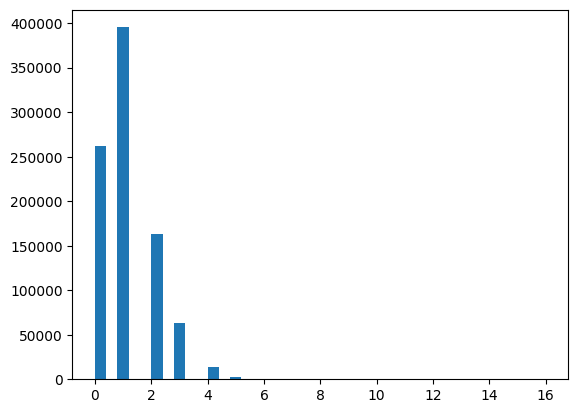

In [42]:
# histogram of number of tags, count number of genre in movies
plt.hist(movies_df["genres"].map(len), bins = 40)
plt.show()

In [43]:
# bar plot with number of tags, count number of genre in movies

# plt.bar(genres_count.keys(), genres_count.values())
# plt.xticks(np.arange(0, 10, step = 1))

# plt.xlabel("genres count per movie")
# plt.ylabel("movies count")

# plt.show()

In [36]:
# dictionary that stores the count that each genre appears in the dataset
genres_dict = defaultdict(int)

In [37]:
for item in movies_df["genres"]:
    
    if len(item) == 0:
        genres_dict["NonGiven"] += 1
        
    else:
        for genre in item:
            genres_dict[genre] += 1
                

In [38]:
print(json.dumps(genres_dict, indent = 1))

{
 "Comedy": 132140,
 "Family": 26920,
 "Adventure": 22131,
 "Drama": 214513,
 "Romance": 49486,
 "NonGiven": 262114,
 "Crime": 32288,
 "Action": 42006,
 "Thriller": 43869,
 "Documentary": 155422,
 "Science Fiction": 19687,
 "Animation": 53575,
 "Mystery": 18572,
 "Horror": 48526,
 "Fantasy": 20813,
 "War": 10366,
 "Music": 47075,
 "Western": 8584,
 "History": 16317,
 "TV Movie": 24522
}


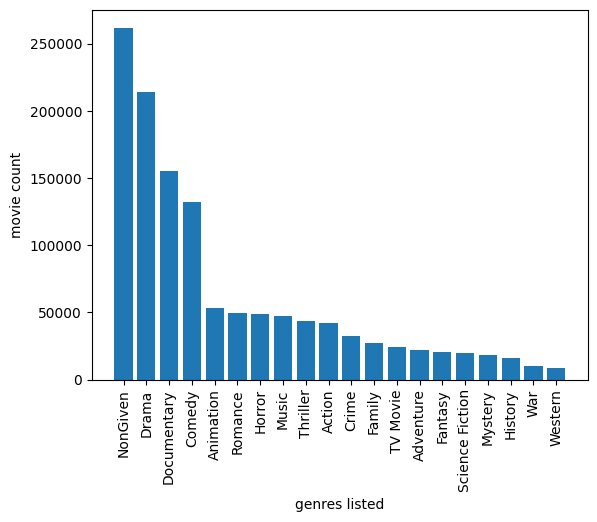

In [88]:
# sort the genres count dictionary by count
sorted_by_genres_count = sorted(genres_dict.items(), key = lambda x: x[1], reverse = True)
genres_list = [item[0] for item in sorted_by_genres_count]
count_list = [item[1] for item in sorted_by_genres_count]

# bar plot with tags, count number of genre in movies
plt.bar(genres_list, count_list)
plt.xticks(rotation = "vertical")

plt.xlabel("genres listed")
plt.ylabel("movie count")

plt.show()

In [ ]:
# convert the lists of genres to strings and modify the "genres" column
movies_df["genres_str"] = ["|".join(map(str, l)) for l in movies_df["genres"]]
movies_df = movies_df.drop(columns = ["genres"], axis = 1)
movies_df

In [8]:
# number of movies with no listed genre
condition = movies_df["genres_str"].map(len) == 0
movies_df[condition]

,id,title,rating,genres_str
3,25449,New World Disorder 9: Never Enough,6.0,
422,538,Janine F.,5.0,
1863,2802,De Arm Van Jezus,0.0,
2045,3094,Elated By Night,0.0,
2144,3398,Rich and Scary: Independent Soap Movie Experience,0.0,
...,...,...,...,...
901410,1255058,Disney Parks Magical Christmas Day Parade,0.0,
901412,1255060,Imago,0.0,
901413,1255061,Justice League: TaskForce (Part One),0.0,
901414,1255062,Demon Castle,0.0,


In [61]:
# assign "NonGiven" to the movies with no listed genre
movies_df.loc[condition, "genres"] = "NonGiven"
movies_df

,id,title,genres,rating
0,3924,Blondie,"[Comedy, Family]",7.063
1,6124,"Peter Voss, Thief of Millions",[Adventure],0.000
2,8773,Love at Twenty,"[Drama, Romance]",6.674
3,25449,New World Disorder 9: Never Enough,NonGiven,6.000
4,31975,Sesame Street: Elmo Loves You!,[Family],0.000
...,...,...,...,...
901412,1255060,Imago,NonGiven,0.000
901413,1255061,Justice League: TaskForce (Part One),NonGiven,0.000
901414,1255062,Demon Castle,NonGiven,0.000
901415,1255063,"Grounds of Coherence #1, but this is the langu...",NonGiven,0.000
